<a href="https://colab.research.google.com/github/bggokmou/BigdataHomework/blob/master/7%EC%A3%BC%EC%B0%A8_%EA%B0%95%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'

weather = pd.read_csv(weather_file, index_col = 0, encoding='CP949')
print(weather.head(3))
print('weather 데이터의 shape :', weather.shape)

            평균기온  최대풍속  평균풍속
일시                          
2010-08-01  28.7   8.3   3.4
2010-08-02  25.2   8.7   3.8
2010-08-03  22.1   6.3   2.9
weather 데이터의 shape : (3653, 3)


In [4]:
print('평균 분석 ----------------------')
print(weather.mean())
print('표준편차 분석-------------------')
print(weather.std())

평균 분석 ----------------------
평균기온    12.942102
최대풍속     7.911099
평균풍속     3.936441
dtype: float64
표준편차 분석-------------------
평균기온    8.538507
최대풍속    3.029862
평균풍속    1.888473
dtype: float64


In [14]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'

weather = pd.read_csv(weather_file, index_col = 0, encoding='CP949')

print('최대풍속의 최대값 : ', weather['최대풍속'].max())
print('평균풍속의 최대값 : ', weather['평균풍속'].max())

최대풍속의 최대값 :  26.0
평균풍속의 최대값 :  14.9


In [7]:
weather.count()

평균기온    3653
최대풍속    3649
평균풍속    3647
dtype: int64

In [13]:
missing_data = weather[ weather['평균풍속'].isna()]
print(missing_data)

Empty DataFrame
Columns: [평균기온, 최대풍속, 평균풍속]
Index: []


In [21]:
# pandas.Dataframe.dropna(axis=0, how='any', inplace=False)
#axis 0이면 행 삭제, 1이면 열삭제.
# any:하나라도없으면 제거대상, all: 전체
# False : 원본을 그대로 두고 대상 삭제한 복사본 사용, True : 원본에서 삭제

In [11]:
weather.fillna(0, inplace=True)
print(weather.loc['2012-02-11'])

평균기온   -0.7
최대풍속    0.0
평균풍속    0.0
Name: 2012-02-11, dtype: float64


In [15]:
weather.fillna(weather['평균풍속'].mean(), inplace=True)
print(weather.loc['2012-02-11'])

평균기온   -0.700000
최대풍속    3.936441
평균풍속    3.936441
Name: 2012-02-11, dtype: float64


In [18]:
d_list=["01/03/2018", "2018-01-05", "2018/01/06", "01,04,2018"]
pd.DatetimeIndex(d_list).year

Index([2018, 2018, 2018, 2018], dtype='int32')

In [19]:
pd.DatetimeIndex(d_list).month

Index([1, 1, 1, 1], dtype='int32')

In [20]:
pd.DatetimeIndex(d_list).day

Index([3, 5, 6, 1], dtype='int32')

Text(0, 0.5, 'Temperature')

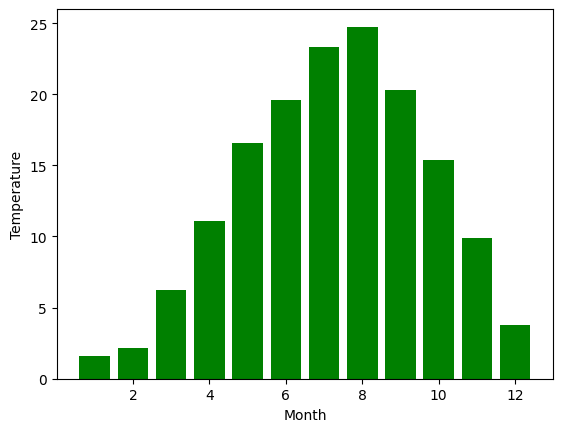

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file= path + 'weather.csv'
weather = pd.read_csv(weather_file , encoding='CP949')

weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range(12)]
monthly_wind = [0 for x in range(12)]
for i in range(12):
    monthly[i] = weather[weather['month'] == i + 1]
    monthly_wind[i] = monthly[i]['평균기온'].astype(float).mean()


months = np.arange(1, 13)
plt.bar(months, monthly_wind, color='green')
plt.xlabel('Month')
plt.ylabel('Temperature')

In [36]:
numeric_cols = weather.select_dtypes(include=[np.number]).columns

# 월별로 그룹화하여 숫자형 열의 평균 계산
monthly_means = weather.groupby('month')[numeric_cols].mean()

print(monthly_means)

            평균기온      최대풍속      평균풍속  month  year
month                                            
1       1.598387  8.158065  3.757419    1.0   1.0
2       2.136396  8.225357  3.946786    2.0   2.0
3       6.250323  8.871935  4.390291    3.0   3.0
4      11.064667  9.305017  4.622483    4.0   4.0
5      16.564194  8.548710  4.219355    5.0   5.0
6      19.616667  6.945667  3.461000    6.0   6.0
7      23.328387  7.322581  3.877419    7.0   7.0
8      24.748710  6.853226  3.596129    8.0   8.0
9      20.323667  6.896333  3.661667    9.0   9.0
10     15.383871  7.766774  3.961613   10.0  10.0
11      9.889667  8.013333  3.930667   11.0  11.0
12      3.753548  8.045484  3.817097   12.0  12.0


In [32]:
weather['year'] = pd.DatetimeIndex(weather['일시']).month
yearly_means = weather.groupby('year')['평균풍속'].mean()

print(yearly_means)

year
1     3.757419
2     3.946786
3     4.390291
4     4.622483
5     4.219355
6     3.461000
7     3.877419
8     3.596129
9     3.661667
10    3.961613
11    3.930667
12    3.817097
Name: 평균풍속, dtype: float64


In [37]:
monthly_means[ monthly_means['평균기온'] >= 4.0]

,평균기온,최대풍속,평균풍속,month,year
month,,,,,
3,6.250323,8.871935,4.390291,3.0,3.0
4,11.064667,9.305017,4.622483,4.0,4.0
5,16.564194,8.548710,4.219355,5.0,5.0
6,19.616667,6.945667,3.461000,6.0,6.0
7,23.328387,7.322581,3.877419,7.0,7.0
8,24.748710,6.853226,3.596129,8.0,8.0
9,20.323667,6.896333,3.661667,9.0,9.0
10,15.383871,7.766774,3.961613,10.0,10.0
11,9.889667,8.013333,3.930667,11.0,11.0


iH6p9SKAHd94ehC